# Chapter 8 - Estimation
https://github.com/AllenDowney/ThinkStats2

## Reading

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np

import thinkstats2
import thinkplot

In [3]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    
    return np.sqrt(mse)

In [4]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.393890360894775
rmse median 0.47758572842561287


In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [108]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.1291804198758683
mean error unbiased 0.015956176811486963


In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

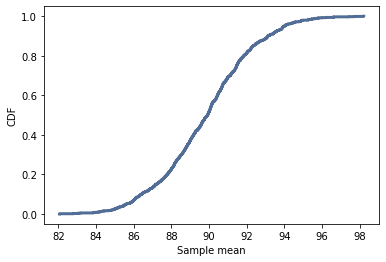

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [9]:
np.mean(xbars)

89.83134883516546

In [10]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.60074624571634, 94.00337153087884)

In [11]:
stderr = RMSE(xbars, 90)
stderr

2.529285203326162

In [12]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0581812243078534
rmse Lm 1.7641818343617457
mean error L 0.2988317544290277
mean error Lm 0.378289923449493


## Exercises

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [13]:
def estimate_rate(n=10, iters=1000):
    lam = 2

    Ls = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Ls.append(L)

    return Ls

In [14]:
Ls = estimate_rate()

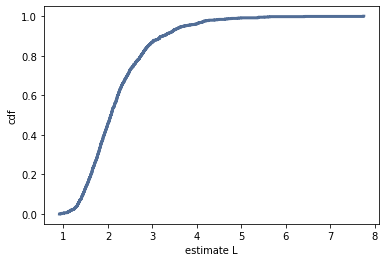

In [17]:
cdf = thinkstats2.Cdf(Ls)

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='estimate L', ylabel='cdf')

In [18]:
stderr = RMSE(Ls, 2)
print(f'The standard error of the estimate is: {stderr}.')

The standard error of the estimate is: 0.8141105087004922.


In [19]:
ci = cdf.Percentile(5), cdf.Percentile(95)
print(f'The 90% CI is: {ci}.')

The 90% CI is: (1.3251971130252265, 3.699235172639285).


In [31]:
ns = np.arange(2, 17)
stderrs = []
for n in ns:
    stderrs.append(RMSE(estimate_rate(n=n), 2))

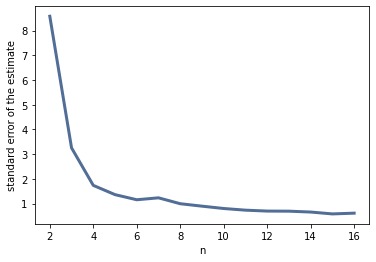

In [32]:
thinkplot.Plot(ns, stderrs)
thinkplot.Config(xlabel='n', ylabel='standard error of the estimate')

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [61]:
def simulate_game(lam):
    """
    Simulates a game by generate the time between goals until the total time
    exceeds 1 game, using the goal-scoring rate `lam`.
    Returns the number of goals scored.
    """
    t = 0
    n_goals = 0
    while True:
        delta_t = np.random.exponential(1.0 / lam)
        t += delta_t
        n_goals += 1
        
        if t + delta_t > 1:
            break
            
    return n_goals

In [112]:
def simulate_many_games(lam, iters=1000000):
    Ls = []
    for _ in range(iters):
        Ls.append(simulate_game(lam))

    return Ls, MeanError(Ls, lam), RMSE(Ls, lam)

In [121]:
Ls, mean_error, rmse = simulate_many_games(2)
print(mean_error, rmse)

0.227308 1.3179772380432069


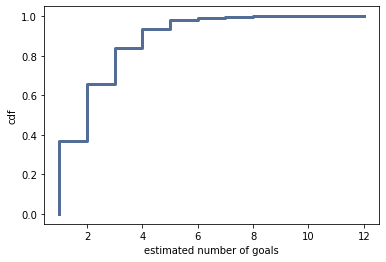

In [122]:
cdf = thinkstats2.Cdf(Ls)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='estimated number of goals', ylabel='cdf')

In [123]:
ci = cdf.Percentile(5), cdf.Percentile(95)
print(f'The 90% CI is: {ci}.')

The 90% CI is: (1, 5).


In [124]:
mean_errs = []
rmses = []
for lam in np.arange(2, 10):
    Ls, mean_error, rmse = simulate_many_games(lam, iters=10000)
    mean_errs.append(mean_error)
    rmses.append(rmse)

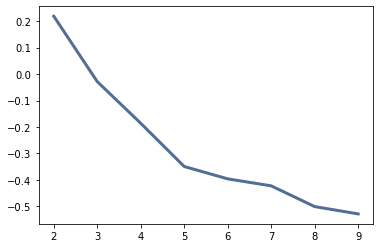

In [125]:
thinkplot.Plot(np.arange(2, 10), mean_errs)

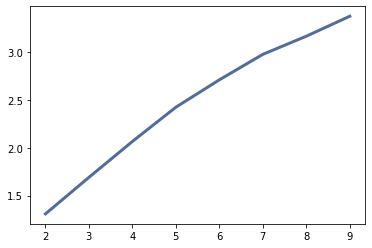

In [120]:
thinkplot.Plot(np.arange(2, 10), rmses)

The mean error is small and decreases with number of iterations indicating that the method is unbiased.

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [126]:
def Estimate4(n=7, m=100000):
    mu = 0
    sigma = 1
    
    estimates_mean = []
    estimates_median = []
    xs = [random.gauss(mu, sigma) for i in range(n)]
    estimates_mean.append(np.mean(xs))
    estimates_median.append(np.median(xs))
    
    print(f'mean error of mean: {MeanError(estimates_mean, mu)}')
    print(f'mean error of median: {MeanError(estimates_median, mu)}')

In [127]:
Estimate4()

mean error of mean: -0.11601841468107447
mean error of median: -0.042850904252197924


The mean and median both yield lower mean error as m increases, so they are both unbiased.